In [234]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# Set default font
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['font.family'] ='sans-serif'

In [235]:
data_file = Path(r"C:\Users\33937\Dropbox\Code\Data-science\2023_car.csv")

In [236]:
data_df = pd.read_csv(data_file, sep=",", parse_dates=True)

In [237]:
data_df.head()

,序号,主申请人申请编码,主申请人姓名,主申请人证件号码,家庭代际数,家庭总积分,成员最早注册时间
0,1,6132100417367,任国昊,110111********5210,3.0,258.0,2011-02-19 20:36:12.000
1,2,50100547205,张鑫,110107********151X,3.0,252.0,2011-03-17 17:32:11.000
2,3,8719100597199,董庆,110101********3014,3.0,252.0,2011-03-31 16:34:31.000
3,4,3057101568639,袁博,110107********0021,3.0,252.0,2012-03-10 16:56:31.000
4,5,9443102498615,魏晶晶,110228********412X,3.0,252.0,2012-07-14 10:39:17.000


In [238]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50883 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   序号        50883 non-null  object 
 1   主申请人申请编码  50883 non-null  int64  
 2   主申请人姓名    50883 non-null  object 
 3   主申请人证件号码  50880 non-null  object 
 4   家庭代际数     50877 non-null  float64
 5   家庭总积分     50877 non-null  float64
 6   成员最早注册时间  50877 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [239]:
data_df["主申请人证件号码"] = data_df["主申请人证件号码"].astype("string")

In [240]:
data_df["成员最早注册时间"] = pd.to_datetime(data_df["成员最早注册时间"])

In [241]:
data_df.describe()

,主申请人申请编码,家庭代际数,家庭总积分
count,5.088300e+04,50877.000000,50877.000000
mean,4.961855e+12,2.458577,88.091082
std,2.893797e+12,0.501353,29.144189
min,2.000000e+00,1.000000,60.000000
25%,2.443100e+12,2.000000,66.000000
50%,4.970102e+12,2.000000,78.000000
75%,7.476105e+12,3.000000,100.000000
max,9.999105e+12,3.000000,258.000000


总共50887个指标，占北京2023年新能源指标数的80%。最低分为60分，最高分为258分，中位数为78分。家庭积分的分布如下图所示：

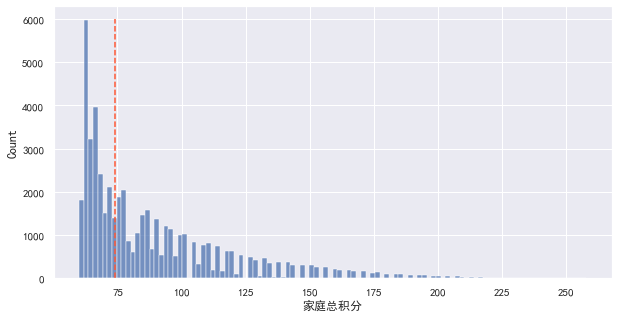

In [273]:
fig,ax = plt.subplots(figsize=(10,5))
sns.histplot(ax=ax, data= data_df, x="家庭总积分")
ax.vlines(x=74, ymin=0, ymax=6000,linestyles="dashed", colors="#FF5733")


区分不同代际的家庭统计结果如下图，可以看出高分家庭基本都是3代家庭，125分以上2代家庭和1代家庭很少，拼爹还是有用的。

<AxesSubplot:xlabel='家庭总积分', ylabel='Count'>

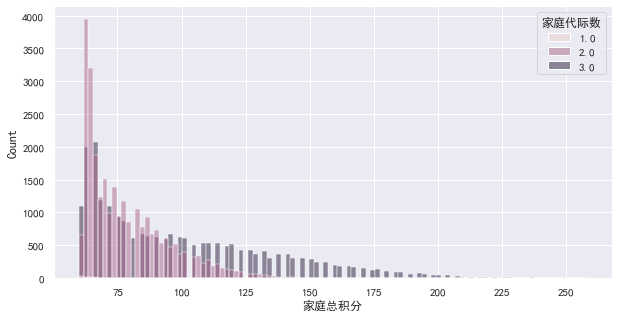

In [243]:
sns.histplot(data= data_df, x="家庭总积分", hue="家庭代际数")

家庭代际数统计如下，可以看出两代人的家庭最多，有27390个，占比53.8%， 三代人的家庭次之，占比46%，一代人的家庭最少，只有78户，占比0.15%。

In [244]:
data_df["家庭代际数"].value_counts()

2.0    27390
3.0    23409
1.0       78
Name: 家庭代际数, dtype: int64

In [245]:
data_df["家庭代际数"].value_counts(normalize=True)

2.0    0.538357
3.0    0.460110
1.0    0.001533
Name: 家庭代际数, dtype: float64

<AxesSubplot:xlabel='家庭代际数', ylabel='Count'>

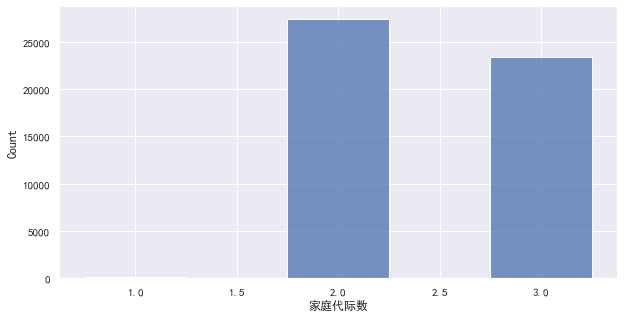

In [246]:
sns.histplot(data= data_df, x="家庭代际数", binwidth=1, discrete=True, shrink=0.5)

In [247]:
data_df["家庭代际数"].value_counts()

2.0    27390
3.0    23409
1.0       78
Name: 家庭代际数, dtype: int64

In [248]:
couple_df =data_df[data_df["家庭代际数"]==1].copy()

In [249]:
couple_df["register_year"] = couple_df["成员最早注册时间"].dt.year

In [250]:
couple_df["register_year"].value_counts()

2011    78
Name: register_year, dtype: int64

这78个1代家庭全是2011年注册的。

In [251]:
data_df["成员最早注册时间"] = pd.to_datetime(data_df["成员最早注册时间"])

成员最早注册时间分布如下图所示，可以看出大部分家庭都是2016年注册，2代家庭2018年之后注册的很少，3代家庭多一些，也就是说2018年之后注册的，能拿到指标的基本都是三代家庭。

<AxesSubplot:xlabel='成员最早注册时间', ylabel='Count'>

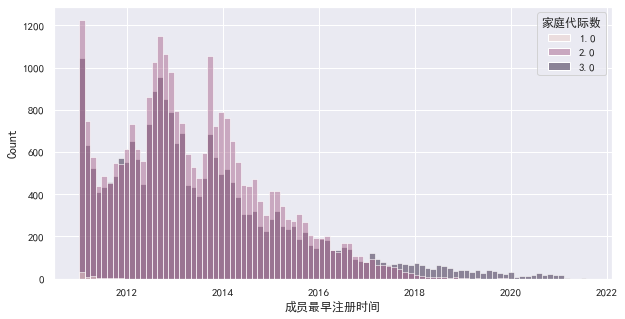

In [252]:
sns.histplot(data= data_df, x="成员最早注册时间", hue="家庭代际数")

看看有多少指标被北京土著拿走了,北京土著拿走了36165个指标， 占71%。

In [253]:
pek_native = data_df[data_df["主申请人证件号码"].str.startswith("11")]

In [254]:
pek_native.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36165 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   序号        36165 non-null  object        
 1   主申请人申请编码  36165 non-null  int64         
 2   主申请人姓名    36165 non-null  object        
 3   主申请人证件号码  36165 non-null  string        
 4   家庭代际数     36165 non-null  float64       
 5   家庭总积分     36165 non-null  float64       
 6   成员最早注册时间  36165 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2), string(1)
memory usage: 2.2+ MB


In [255]:
data_df = data_df.dropna(axis=0)

In [261]:
native_categories = ["Bejing"]

In [262]:
conditions = [data_df["主申请人证件号码"].str.startswith("11").astype(bool)]

In [263]:
data_df["出生地"] = np.select(conditions, native_categories, default="Other")

<AxesSubplot:xlabel='家庭总积分', ylabel='Count'>

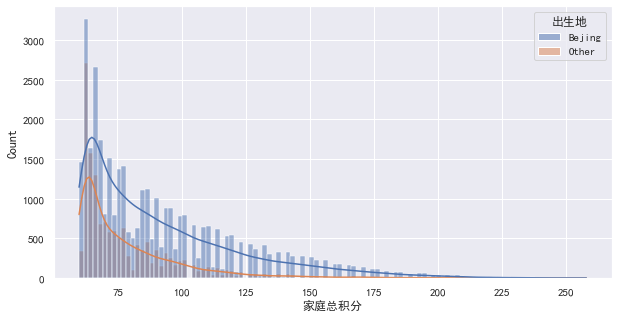

In [275]:
sns.histplot(data= data_df, x="家庭总积分", hue="出生地", kde=True)

<AxesSubplot:xlabel='家庭代际数', ylabel='Count'>

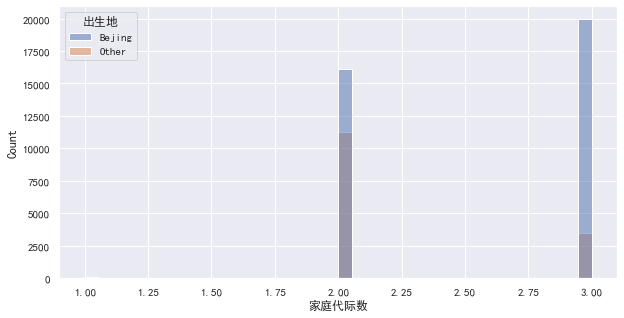

In [265]:
sns.histplot(data= data_df, x="家庭代际数", hue="出生地")

<AxesSubplot:xlabel='成员最早注册时间', ylabel='Count'>

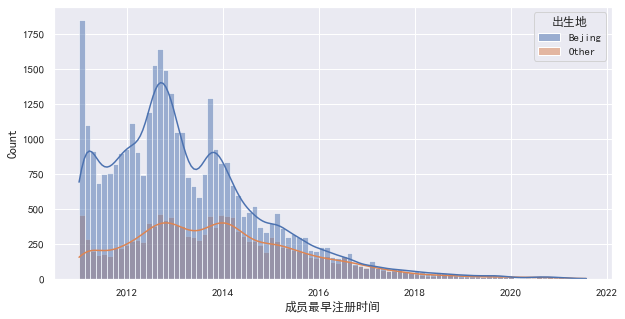

In [274]:
sns.histplot(data= data_df, x="成员最早注册时间", hue="出生地", kde=True)